In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib.dates import DateFormatter, date2num
import numpy as np
from statsmodel import lowess


ModuleNotFoundError: No module named 'statsmodel'

In [176]:
timing_data_post_op = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/timings_post-optimisation1.csv', names=['none','Time (S)','Carbon','Demand (MW)','Datetime'])
timing_data = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/timing_results.csv',  names=['none','Time (S)','Carbon','Demand (MW)','Datetime'])
timing_data_post_op = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/timings_post-optimisation2.csv', names=['none','Time (S)','Carbon','Installed Capacity (MW)','Datetime'])

# timing_data_post_op['Time (S)'] = pd.to_timedelta(timing_data_post_op['Time (S)'], unit="s")
# timing_data_post_op['Time (S)'] = pd.to_datetime(timing_data_post_op['Time (S)'])
timing_data_post_op = timing_data_post_op[timing_data_post_op['Datetime']<'2019-02-01']

timing_data_post_op

,none,Time (S),Carbon,Installed Capacity (MW),Datetime
0,0,70.829840,0,1334.2,2019-01-29_17-30-22
1,0,90.194103,20,1334.2,2019-01-29_17-31-00
2,0,95.201776,20,1334.2,2019-01-29_17-31-06
3,0,115.005914,0,1334.2,2019-01-29_17-31-07
4,0,120.283104,0,1334.2,2019-01-29_17-31-12
5,0,112.680688,20,1334.2,2019-01-29_17-31-22
6,0,172.295532,20,1334.2,2019-01-29_17-32-22
7,0,197.569808,20,1334.2,2019-01-29_17-32-48
8,0,267.605319,0,3520.9,2019-01-29_17-33-41
9,0,372.671628,0,3520.9,2019-01-29_17-35-25


In [25]:
# timing_data['Capacity'] = pd.to_numeric(timing_data['Capacity'])

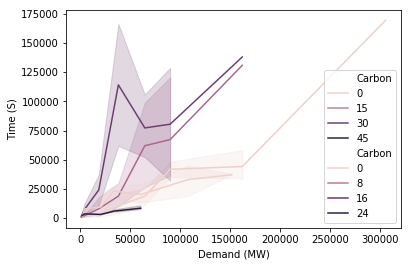

In [42]:
fig = plt.figure()
sns.lineplot(x="Demand (MW)", y='Time (S)', hue='Carbon', data = timing_data)
sns.lineplot(x="Demand (MW)", y='Time (S)', hue='Carbon', data = timing_data_post_op)

fig.savefig('timing_plot.png')

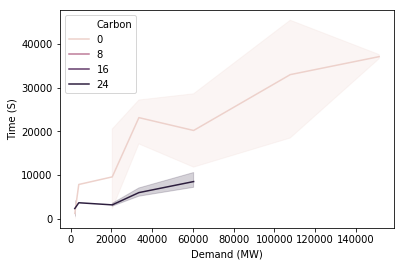

In [41]:
sns.lineplot(x="Demand (MW)", y='Time (S)', hue='Carbon', data = timing_data_post_op)
fig.savefig('timing_plot.png')

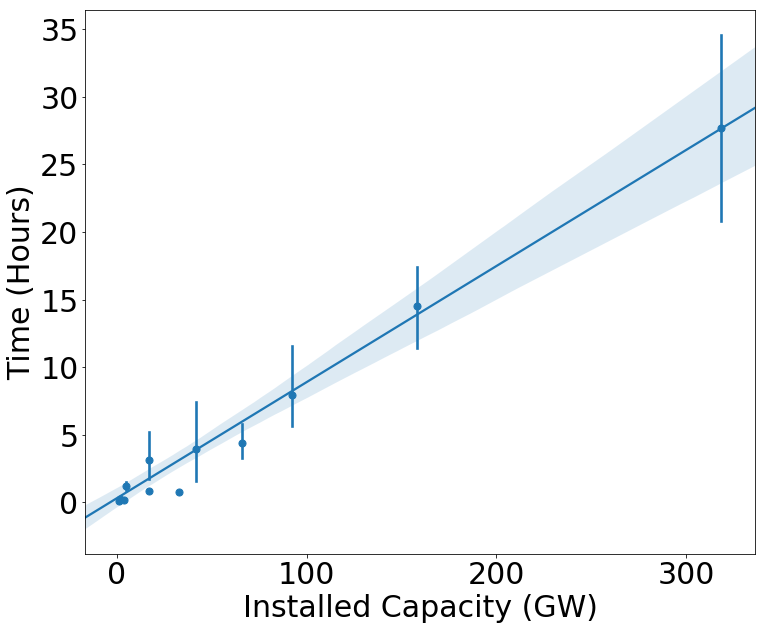

In [177]:
# fig, ax = plt.subplots()
# myFmt = DateFormatter("%H:%M:%S")
# ax.yaxis.set_major_formatter(myFmt)



# sns.lineplot(x="Installed Capacity (MW)", y='Time (S)', hue='Carbon', data = timing_data_post_op)
# plt.rcParams['figure.figsize'] = 12, 10

# plt.rcParams.update({'font.size': 20})

timing_data_post_op['Time (Hours)'] = timing_data_post_op['Time (S)']/(60*60)
timing_data_post_op['Installed Capacity (GW)'] = timing_data_post_op['Installed Capacity (MW)']/1000
# plt.gcf().autofmt_xdate()
fig = plt.figure()

plt.rcParams.update({'font.size': 30})
# sns.lineplot(x="Installed Capacity (MW)", y='Time (S)', hue="Carbon", data = timing_data_post_op)
sns.regplot(x="Installed Capacity (GW)", y='Time (Hours)',  data = timing_data_post_op, x_estimator=np.mean)


fig.savefig('timing_plot.png')
# plt.rcParams['figure.figsize'] = 12, 10

# plt.rcParams.update({'font.size': 20})


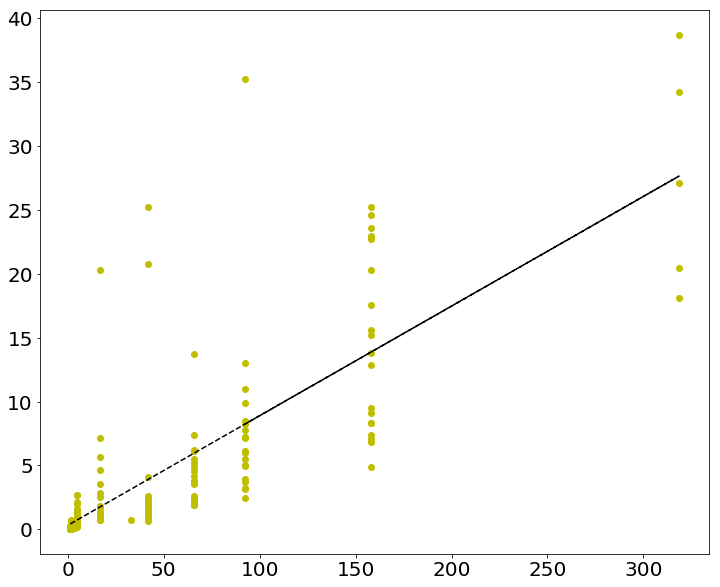

In [150]:

fit = np.polyfit(timing_data_post_op["Installed Capacity (GW)"],timing_data_post_op['Time (Hours)'],1)
fit_fn = np.poly1d(fit) 

plt.plot(timing_data_post_op["Installed Capacity (GW)"],timing_data_post_op['Time (Hours)'], 'yo', timing_data_post_op["Installed Capacity (GW)"], fit_fn(timing_data_post_op["Installed Capacity (GW)"]), '--k')

# sns.scatterplot(x="Installed Capacity (MW)", y='Time (S)', hue='Carbon',data = timing_data_post_op)
